In [393]:
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [394]:
data = pd.read_csv("demand_inventory.csv")
print(data.head())

   Unnamed: 0        Date Product_ID  Demand  Inventory
0           0  2023-06-01         P1      51       5500
1           1  2023-06-02         P1     141       5449
2           2  2023-06-03         P1     172       5308
3           3  2023-06-04         P1      91       5136
4           4  2023-06-05         P1     198       5045


In [395]:
data = data.drop(columns=['Unnamed: 0'])
data.set_index('Date', inplace=True)


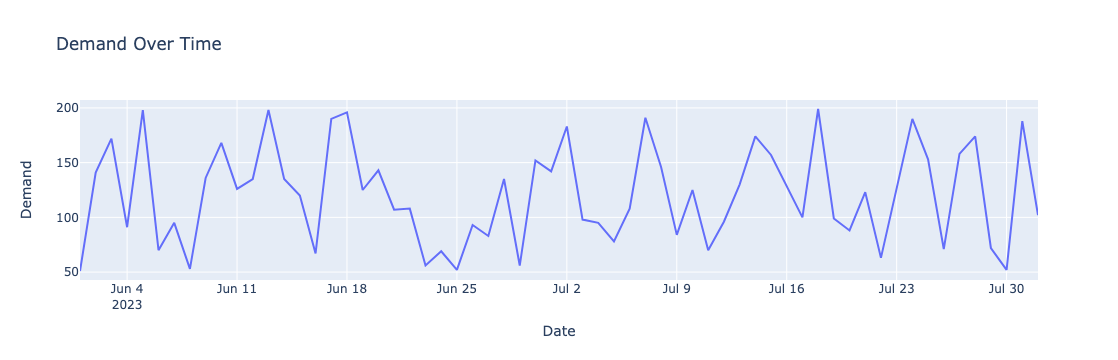

In [396]:
fig_demand = px.line(data, x=data.index,
                     y='Demand',
                     title='Demand Over Time')
fig_demand.show()

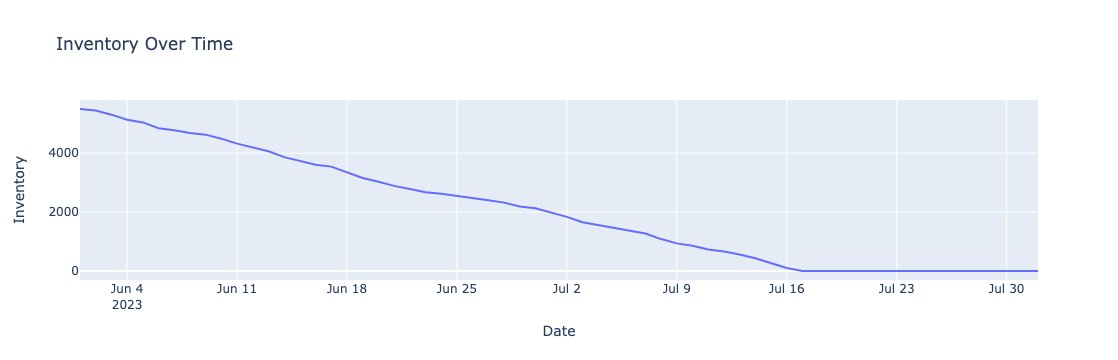

In [397]:
fig_inventory = px.line(data, x=data.index,
                        y='Inventory',
                        title='Inventory Over Time')
fig_inventory.show()

In [398]:
#H0 = It is non stationary
#HA = It is Stationary
result = adfuller(data['Demand'])
labels = ['ADF Test Statistics', 'P-Value','Lags used','number of observations used']
for value,label in zip(result,labels):
    print(label+':'+str(value))
if result[1]<0.05:
    print("Reject the Null hypothesis, i.e. the data is Stationary")
else:
    print("Accept the Null Hypothesis, i.e. the data is Non Stationary")
    


ADF Test Statistics:-7.518718190638632
P-Value:3.8413100077967724e-11
Lags used:0
number of observations used:61
Reject the Null hypothesis, i.e. the data is Stationary


In [399]:
#this implies that d=0

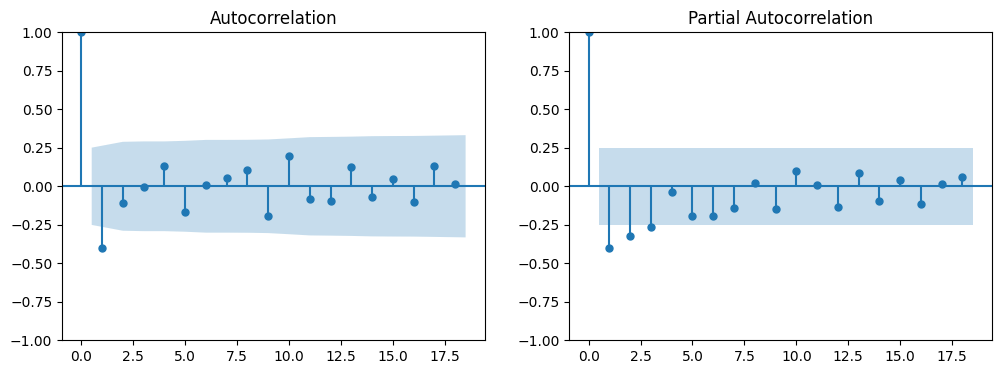

In [400]:
#data['Date'] = pd.to_datetime(data['Date'],
                                     #format='%Y-%m-%d')
#time_series = data.set_index('Date')['Demand']

differenced_series = data['Demand'].diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [401]:
# Here we can see that p=1 and q=1

In [402]:
model = SARIMAX(data['Demand'],order=(1,1,1),seasonal_order=(1,1,1,2))
pred = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34335D+00    |proj g|=  7.31240D-02

At iterate    5    f=  5.31403D+00    |proj g|=  1.27172D-02

At iterate   10    f=  5.22564D+00    |proj g|=  1.38645D-01

At iterate   15    f=  5.10491D+00    |proj g|=  8.25353D-03

At iterate   20    f=  5.10439D+00    |proj g|=  5.51568D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   5.516D-06   5.104D+00
  F =   5.1043887381478656     

CONVERG

 This problem is unconstrained.


2023-07-11    114
2023-07-12    118
2023-07-13    101
2023-07-14    125
2023-07-15    108
2023-07-16    129
2023-07-17    110
2023-07-18    130
2023-07-19    127
2023-07-20    131
2023-07-21    108
2023-07-22    143
2023-07-23    100
2023-07-24    132
2023-07-25    121
2023-07-26    128
2023-07-27    110
2023-07-28    138
2023-07-29    130
2023-07-30    117
2023-07-31    118
2023-08-01    137
2023-08-02    117
Freq: D, Name: predicted_mean, dtype: int64


<Axes: xlabel='Date'>

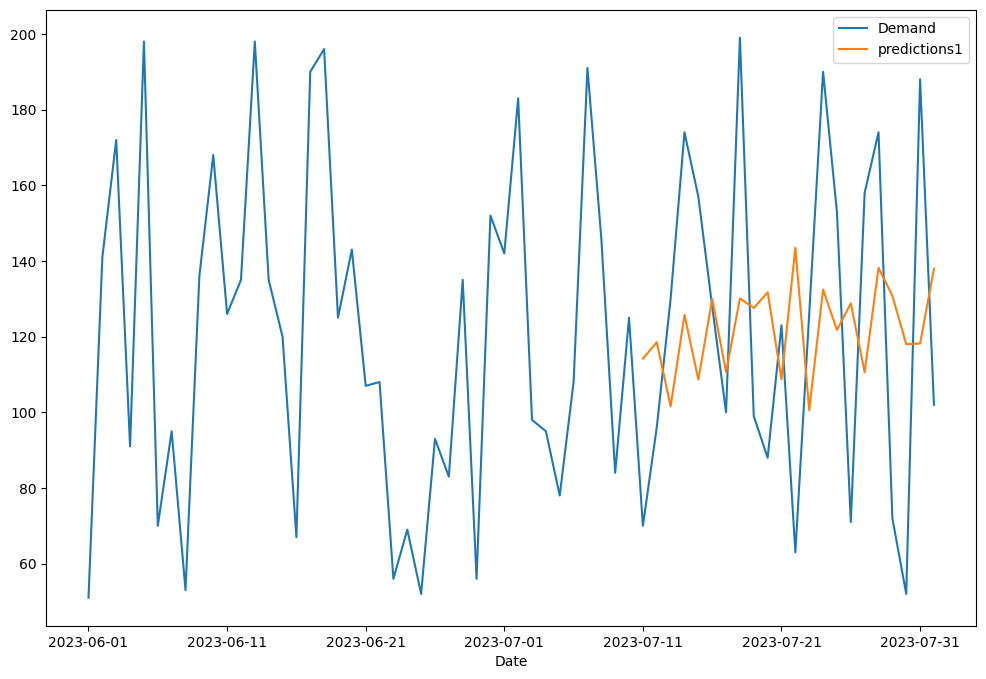

In [403]:
data['predictions1'] = pred.predict(start=40, end=62)
predictions=pred.predict(start=40, end=62)
predictions = predictions.astype(int)
print(predictions)
data[['Demand','predictions1']].plot(figsize=(12,8))

In [404]:
mse = ((data['predictions1'] - data['Demand']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2181.45


In [405]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 46.71


### Demand Forecast

In [406]:
from pandas.tseries.offsets import DateOffset
data.index = pd.to_datetime(data.index).normalize()
future_dates=[data.index[-1]+ DateOffset(days=x)for x in range(0,20)]

In [407]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [408]:
future_datest_df

,Product_ID,Demand,Inventory,predictions1
2023-08-02,NaN,NaN,NaN,NaN
2023-08-03,NaN,NaN,NaN,NaN
2023-08-04,NaN,NaN,NaN,NaN
2023-08-05,NaN,NaN,NaN,NaN
2023-08-06,NaN,NaN,NaN,NaN
2023-08-07,NaN,NaN,NaN,NaN
2023-08-08,NaN,NaN,NaN,NaN
2023-08-09,NaN,NaN,NaN,NaN
2023-08-10,NaN,NaN,NaN,NaN
2023-08-11,NaN,NaN,NaN,NaN


In [409]:
future_df=pd.concat([data,future_datest_df])

<Axes: >

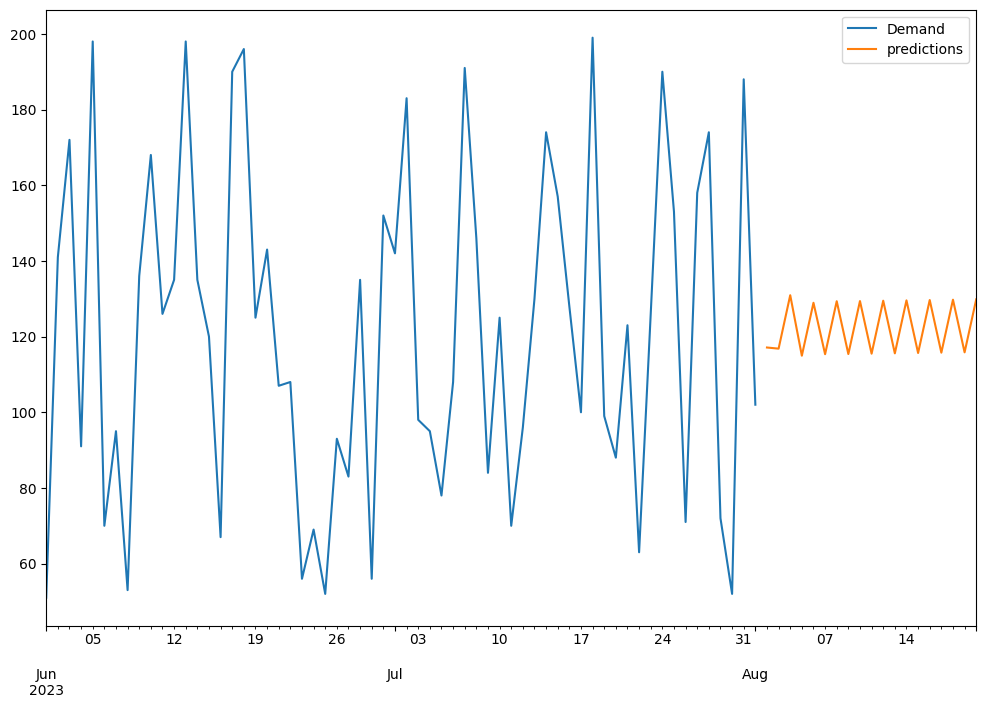

In [410]:
future_df['predictions'] = pred.predict(start = 62, end = 82)  
future_df[['Demand','predictions']].plot(figsize=(12, 8))

In [411]:
future_df.tail(10)

,Product_ID,Demand,Inventory,predictions1,predictions
2023-08-11,NaN,NaN,NaN,NaN,115.484075
2023-08-12,NaN,NaN,NaN,NaN,129.486764
2023-08-13,NaN,NaN,NaN,NaN,115.571761
2023-08-14,NaN,NaN,NaN,NaN,129.574385
2023-08-15,NaN,NaN,NaN,NaN,115.660773
2023-08-16,NaN,NaN,NaN,NaN,129.663407
2023-08-17,NaN,NaN,NaN,NaN,115.749579
2023-08-18,NaN,NaN,NaN,NaN,129.752212
2023-08-19,NaN,NaN,NaN,NaN,115.838417
2023-08-20,NaN,NaN,NaN,NaN,129.841050


### Inventory Optimization

In [415]:
# Create date indices for the future predictions
future_steps = 19
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(days=1), periods=future_steps, freq='D')

# Create a pandas Series with the predicted values and date indices
forecasted_demand = pd.Series(future_df['predictions'].tail(20), index=future_dates)

# Initial inventory level
initial_inventory = 5500

# Lead time (number of days it takes to replenish inventory) 
lead_time = 1 # it's different for every business, 1 is an example

# Service level (probability of not stocking out)
service_level = 0.95 # it's different for every business, 0.95 is an example

# Calculate the optimal order quantity using the Newsvendor formula
z = np.abs(np.percentile(forecasted_demand, 100 * (1 - service_level)))
order_quantity = np.ceil(forecasted_demand.mean() + z).astype(int)

# Calculate the reorder point
reorder_point = forecasted_demand.mean() * lead_time + z

# Calculate the optimal safety stock
safety_stock = reorder_point - forecasted_demand.mean() * lead_time

# Calculate the total cost (holding cost + stockout cost)
holding_cost = 0.1  # it's different for every business, 0.1 is an example
stockout_cost = 10  # # it's different for every business, 10 is an example
total_holding_cost = holding_cost * (initial_inventory + 0.5 * order_quantity)
total_stockout_cost = stockout_cost * np.maximum(0, forecasted_demand.mean() * lead_time - initial_inventory)

# Calculate the total cost
total_cost = total_holding_cost + total_stockout_cost

print("Optimal Order Quantity:", order_quantity)
print("Reorder Point:", reorder_point)
print("Safety Stock:", safety_stock)
print("Total Cost:", total_cost)

Optimal Order Quantity: 238
Reorder Point: 237.6679561744309
Safety Stock: 115.30702856464437
Total Cost: 561.9


- **Optimal Order Quantity**: 238 units
  - The quantity to be ordered when inventory reaches a certain level.
- **Reorder Point**: 235.66 units
  - The inventory level at which a new order should be placed.
- **Safety Stock**: 115.30 units
  - Additional inventory to account for uncertainties in demand and supply.
- **Total Cost**: 561.9 units
  - Combined costs associated with inventory management.
